# Exploratory Data Analysis (EDA) Madrid

En este ejercicio vamos a utilizar el excel **`DatosMadrid.xlsx`**, este excel contiene información sobre los distritos y barrios de Madrid.

Para esta actividad vamos a explorar el **`DataFrame`**, veamos que tipo de información tiene y luego vamos a generar visualizaciones que represente la información del **`DataFrame`**.

Este ejercicio es libre, es decir, puedes decidir que información poner en las visualizaciones y cuantas quieres hacer, la idea es realizar un **`EDA`** y entender los datos con los que estamos trabajando.

Busca un archivo **`GeoJSON`** para representar información en un **`Choropleth`** de los barrios/distritos.

Prueba creando tus propios atributos utilizando la información del **`DataFrame`**.

Escribe en un documento (o en el notebook) una lista de todas las graficas que quieres hacer y lo que representan, como por ejemplo:<br> **`El número de personas mayores de 65 por barrio o municipio`**.

Durante este proceso lo más probable es que consigas valores atípicos (**outliers**) y/o valores faltantes (**NaN's**).

Al final del ejercicios explica las gráficas y tus hallazgos/conclusiones.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

chuleta
Seguridad percibida de noche POR franja de edad en DISTRITO centro

renta neta hogares vs nacimientos
instalaciones deportivas vs edad promedio 
actividades económicas vs distritos

In [3]:
df = pd.read_excel("DatosMadrid.xlsx")
df.head(3) 

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Seguridad Percibida de Noche,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n
0,Madrid,Centro,NaN,140991,10919,107548,22006,43.89,261.823804,5.228,...,69.8,1936,309,4830.0,-0.2,-1.000,-5.100,5096.0,77.3,73.6
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,69.8,325,52,4764.0,-0.1,0.008,0.018,5073.0,77.3,73.6
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,69.8,648,104,4162.0,0.0,-1.700,-7.300,4489.0,77.3,73.6


In [4]:
df.dropna(subset = ["Barrios"], inplace=True)
df['Autobus']

1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
147    1.0
148    1.0
149    1.0
150    1.0
151    1.0
Name: Autobus, Length: 131, dtype: float64

In [5]:
df.columns
df_ = df[['Municipio', 'Distrito', 'Barrios', 'Población', 'Densidad',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Calidad del aire','Monumentos', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021','Máximo histórico(precio)',
       'Satisfacción de vivir en su barrio \n',
       'Calidad de vida actual en su barrio \n']]

In [6]:
dfCorr1 = df_.corr()
dfCorr = (df_.corr() > 0.6) | (df_.corr() < -0.6)
dfNuevo = dfCorr1[dfCorr]


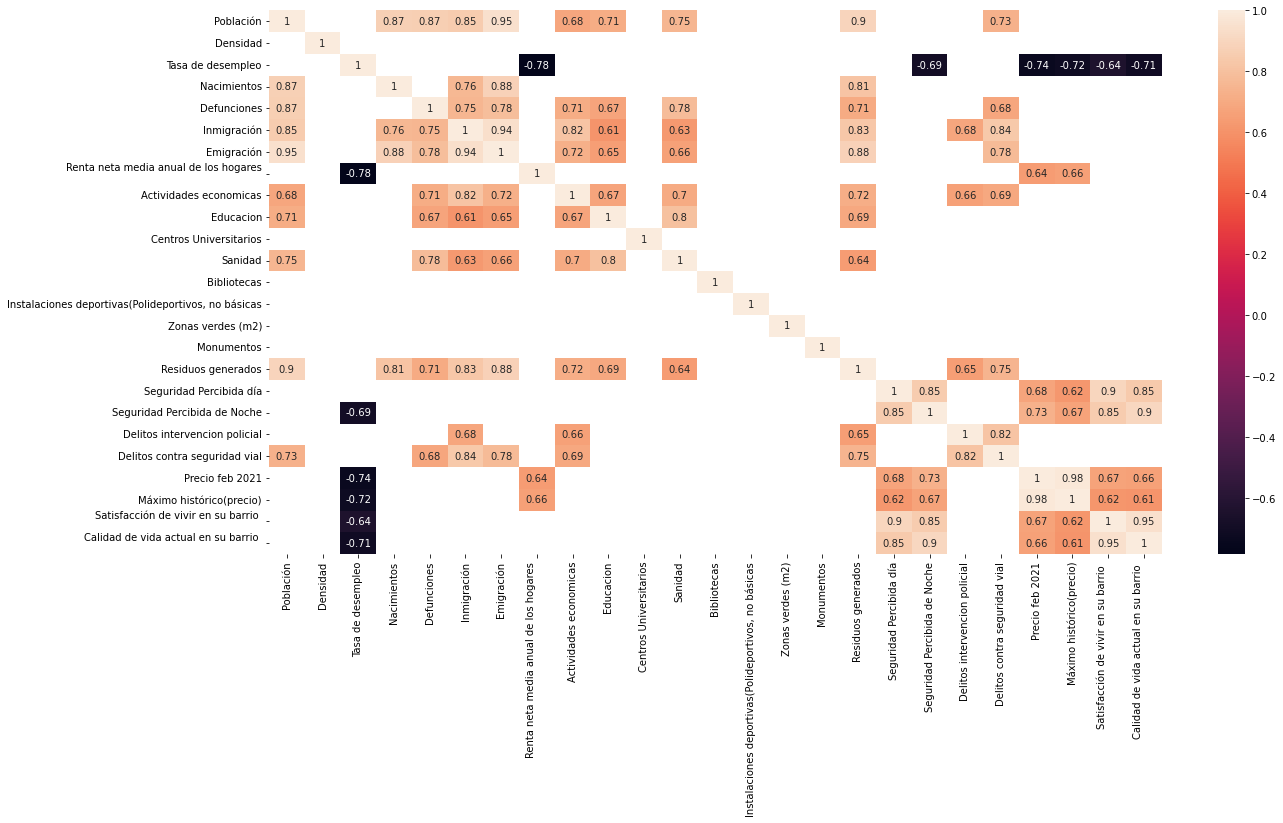

In [7]:

plt.figure(figsize = (20,10))
sns.heatmap(data = dfNuevo, annot = True)
plt.show()

In [8]:
numBarrios = len(df['Barrios'].unique())
numDistritos = len(df['Distrito'].unique())

In [9]:
print(f'Madrid está dividido en {numDistritos} distritos y tiene un total de {numBarrios} barrios.')

Madrid está dividido en 21 distritos y tiene un total de 131 barrios.


In [10]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(pre

In [11]:
#Ven a la escuela de calor


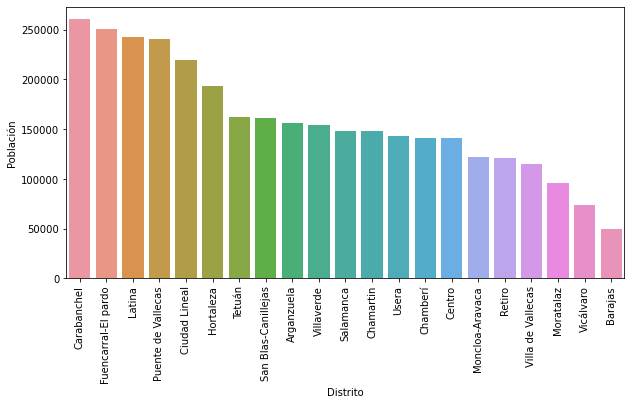

In [12]:
# Población por distritos 
plt.figure(figsize = (10,5))
ax = sns.barplot(x = "Distrito", y = "Población", data = (df.groupby(['Distrito'], as_index=False)['Población'].sum()).sort_values(['Población'], ascending=False))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

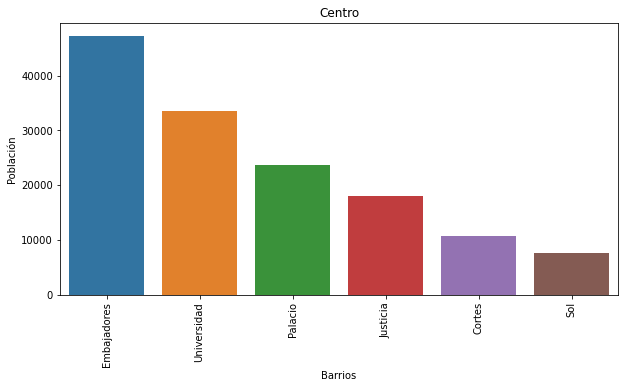

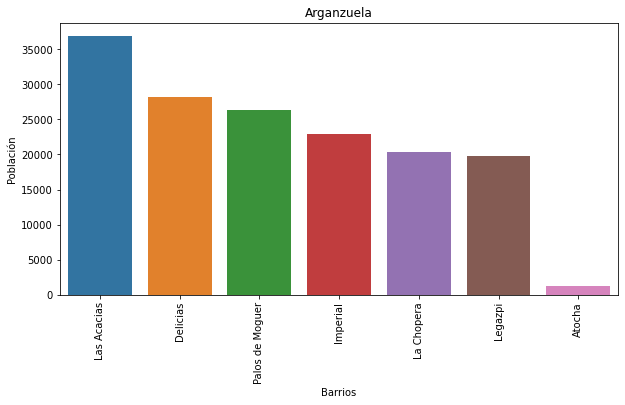

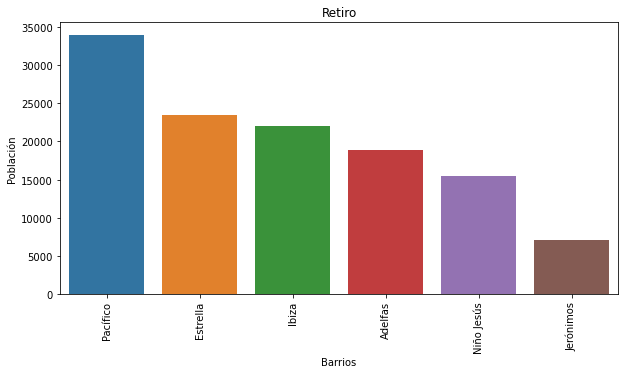

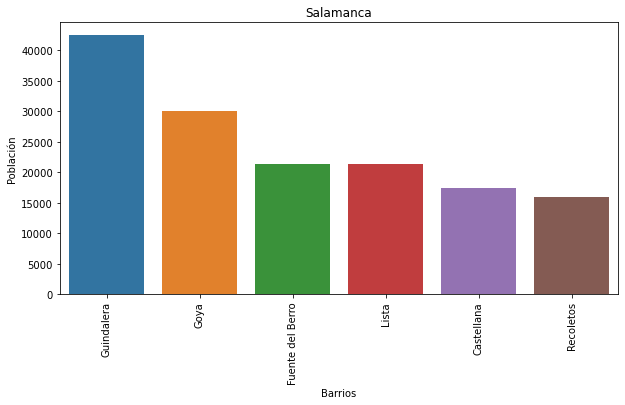

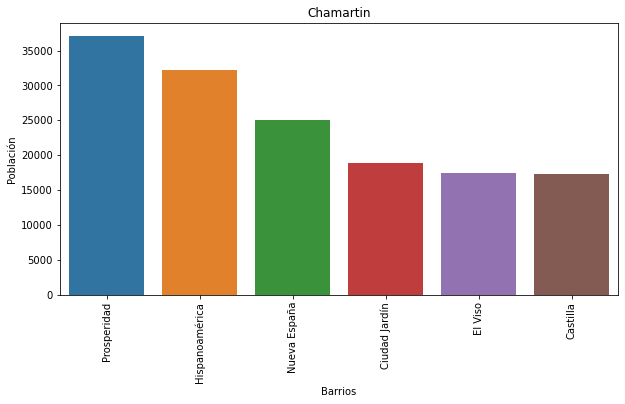

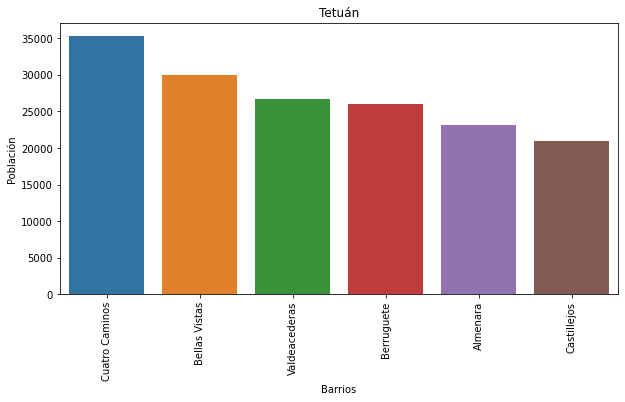

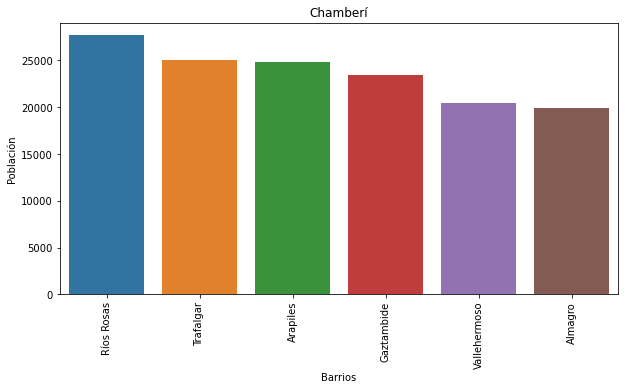

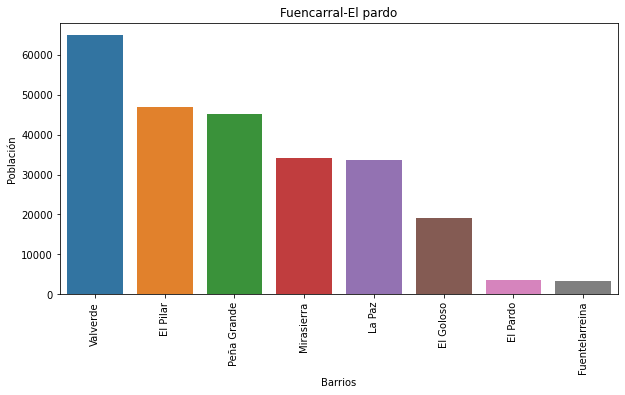

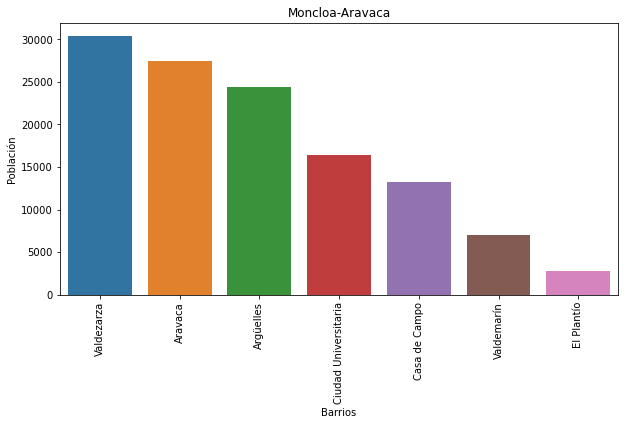

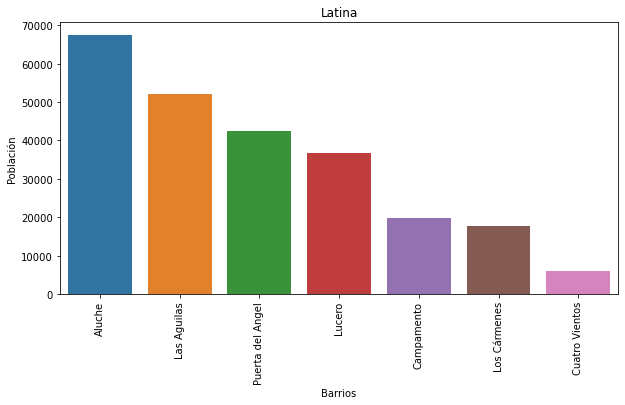

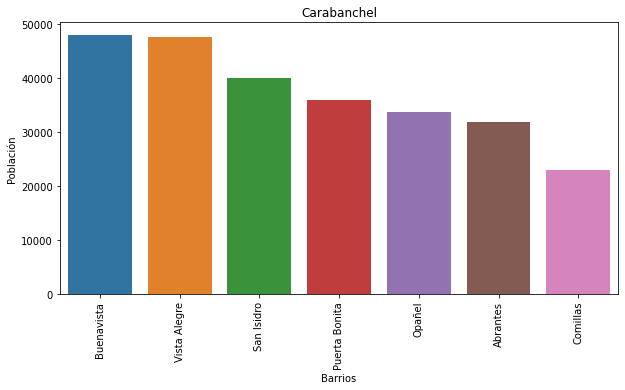

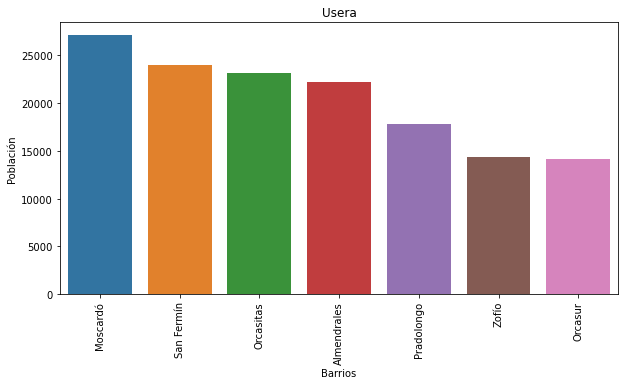

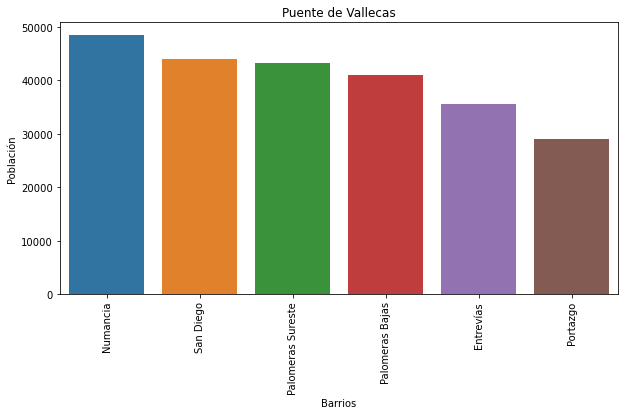

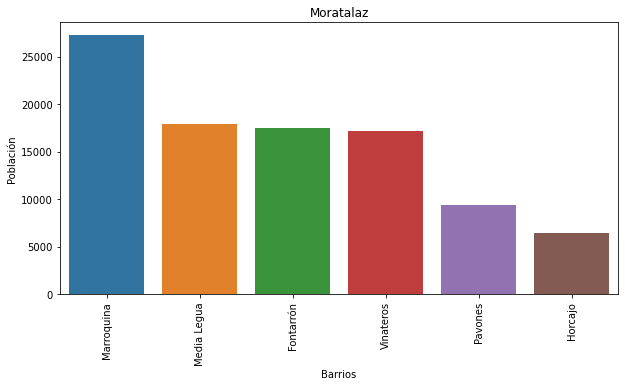

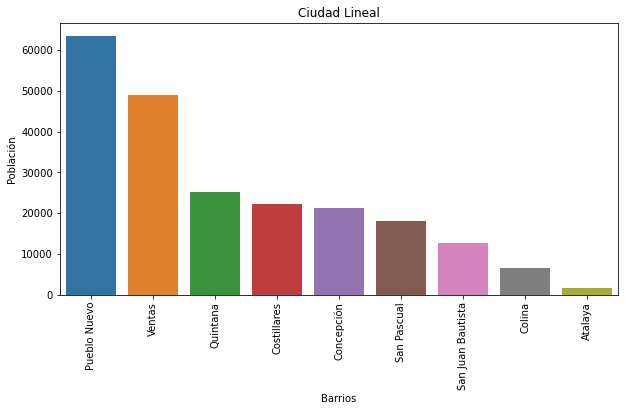

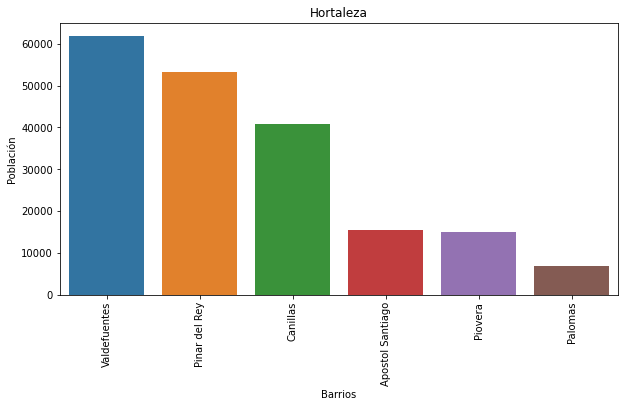

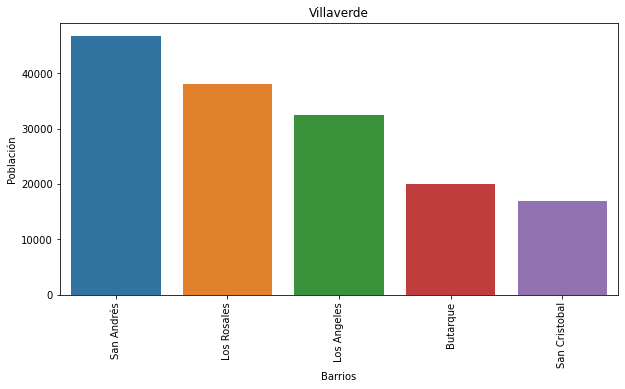

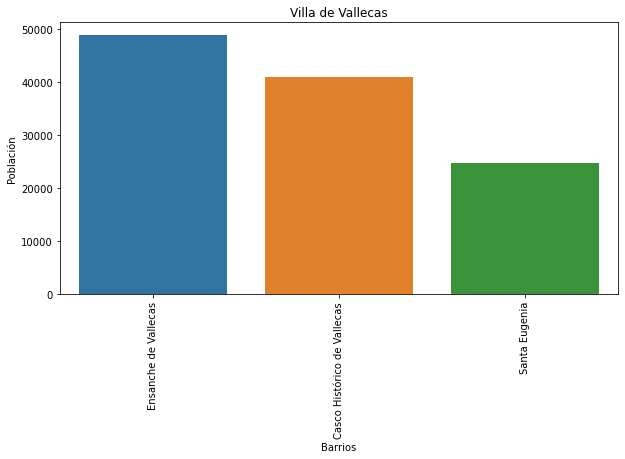

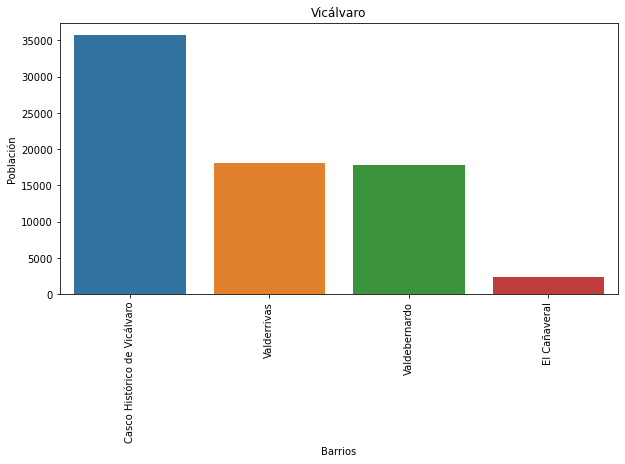

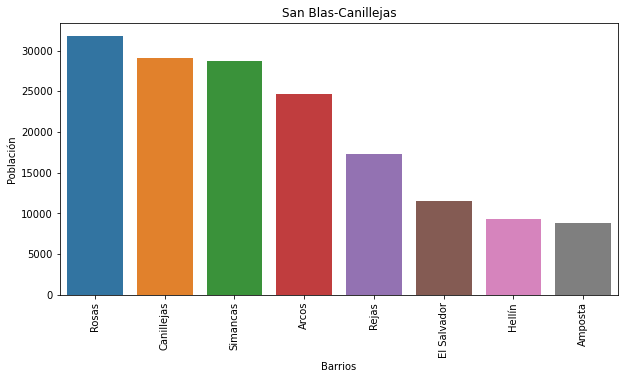

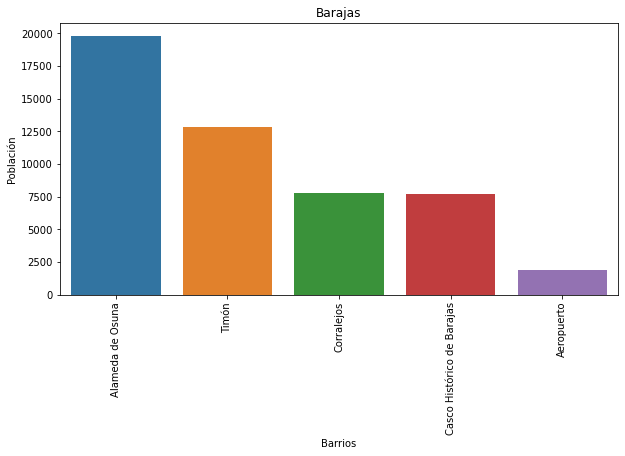

In [13]:
for x in df["Distrito"].unique():
    dfpc2=(df[df['Distrito']== x][['Barrios','Población']]).groupby('Barrios', as_index=False).sum().sort_values(['Población'], ascending=False)
    plt.figure(figsize = (10,5))
    ax = sns.barplot(x = "Barrios", y = "Población", data =dfpc2)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.title(x)
    plt.show()

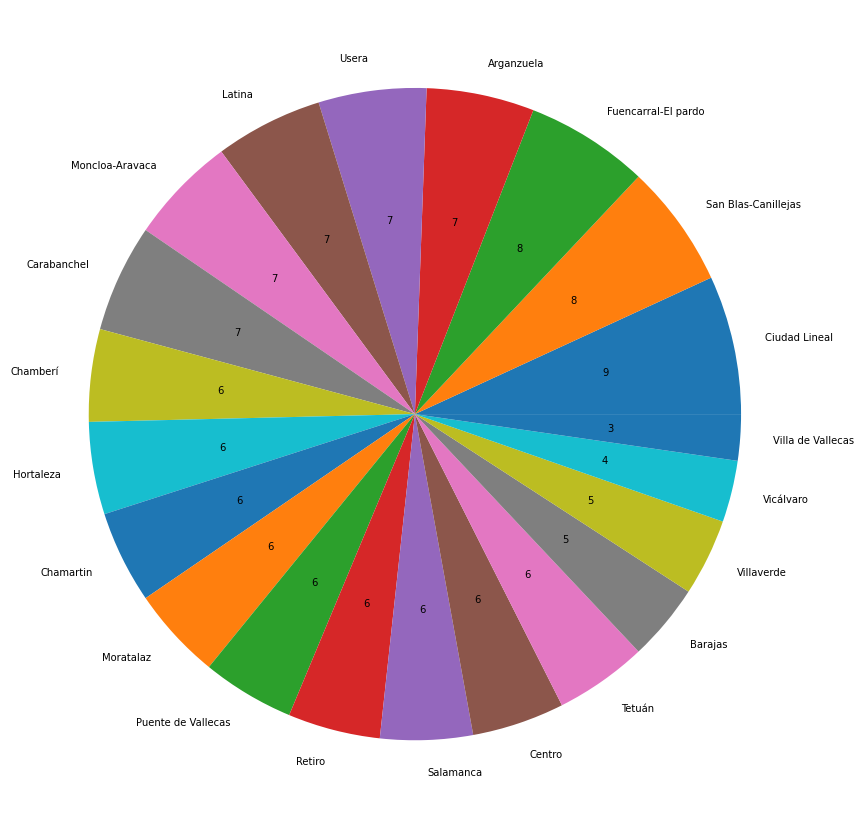

In [14]:
barriosPorDistrito = (df.groupby(['Distrito'], as_index=False)['Barrios'].count()).sort_values(['Barrios'], ascending=False)
plt.figure(figsize = (25,15))
plt.pie(barriosPorDistrito['Barrios'], labels = barriosPorDistrito['Distrito'], autopct = lambda x : '{:.0f}'.format(x*barriosPorDistrito["Barrios"].sum()/100))

plt.show()

In [15]:
#defunciones vs barrios

# Creamos el tanto por ciento de defunciones por población
df["% Defunciones"] = df["Defunciones"] / df["Población"] * 100
df.head(3)

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n,% Defunciones
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,325,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6,0.810298
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,648,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6,0.728443
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,148,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6,0.796813


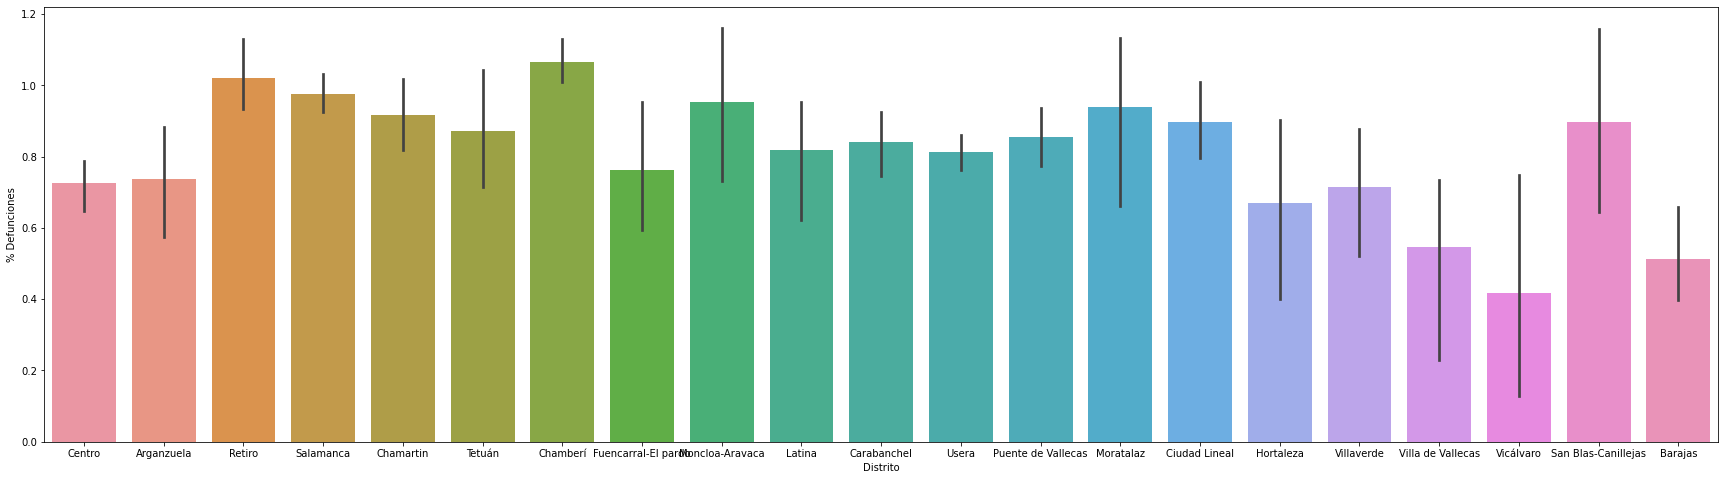

In [16]:
plt.figure(figsize = (30, 8))
sns.barplot(x = df["Distrito"], y = df["% Defunciones"])
plt.show()
#Los barrios más caros, tienene una mayor mortalidad. 

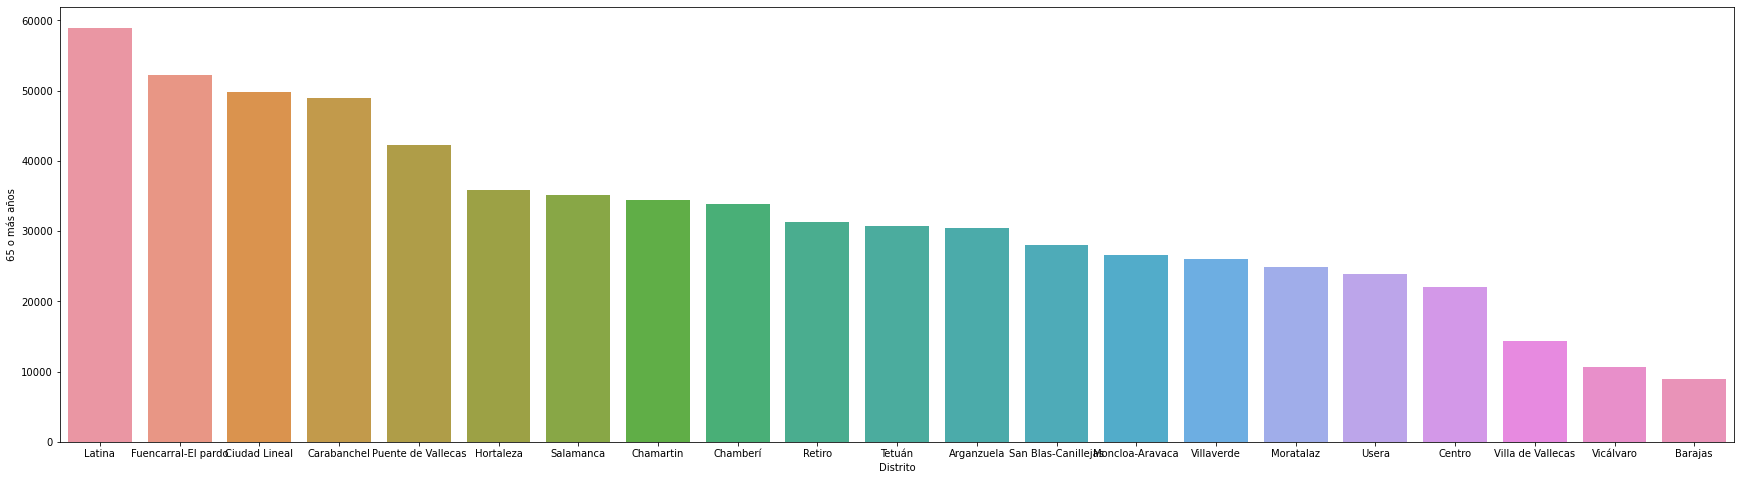

In [17]:
#Vamos a ver qué barrios tienen una edad promedio más alta
df_ = df[["65 o más años", "Distrito"]].groupby("Distrito", as_index = False).sum().sort_values("65 o más años", ascending = False)

plt.figure(figsize = (30, 8))
sns.barplot(x = df_["Distrito"], y = df_["65 o más años"])
plt.show()


In [18]:
#podemos concluir que el número de personas mayores no está relacionado con la mortalidad por distrito

In [19]:
#Tasa de desempleo vs delitos intervencion policial

In [20]:
df["% Delitos"] = df["Delitos intervencion policial"] / df["Población"] * 100
df.head(3)

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n,% Defunciones,% Delitos
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6,0.810298,1.371597
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6,0.728443,1.372184
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6,0.796813,1.371259


<Figure size 2160x576 with 0 Axes>

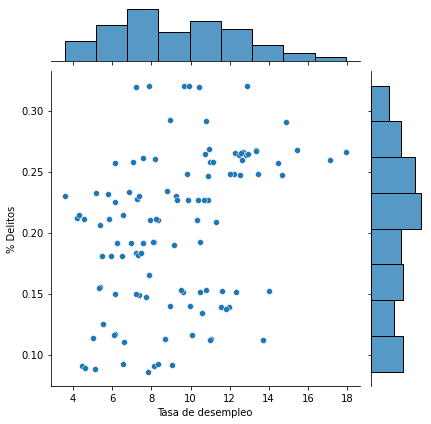

In [21]:
#tasa de desempleo vs delitos intervencion policial


plt.figure(figsize = (30, 8))

sns.jointplot(x = df["Tasa de desempleo"],
             y = df[df["% Delitos"]<0.4]["% Delitos"])
plt.show()

# llegamos a la conclusión que no hay correlacción entre el desempleo y intervención policial.
# Adicionalmente, hemos realizado un filtro, para eliminar a los outliers.

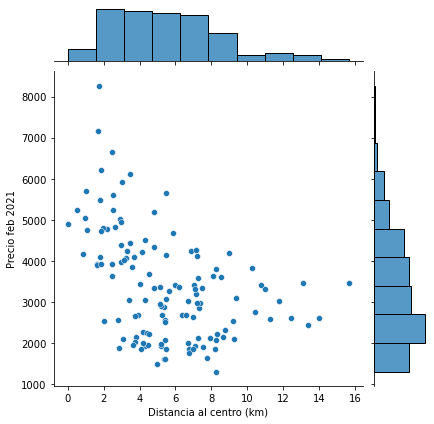

In [22]:
#distancia al centro vs precio fb 2021##



g = sns.jointplot(x = df[df["Distancia al centro (km)"]<30]["Distancia al centro (km)"],
                  y = df["Precio feb 2021"],)
                  ##hue = df["Distrito"])
              
##g.legend(loc='center left', bbox_to_anchor=(1, 0.5))



#Llegamos a la conclusión que hay relación inversa entre distancia y precio
#aparte tenemos un outlier, que hemos identificado como el distrito 
#del Goloso que se encuentra muy lejos, con bajo precio; que hemos eliminado con un filtro

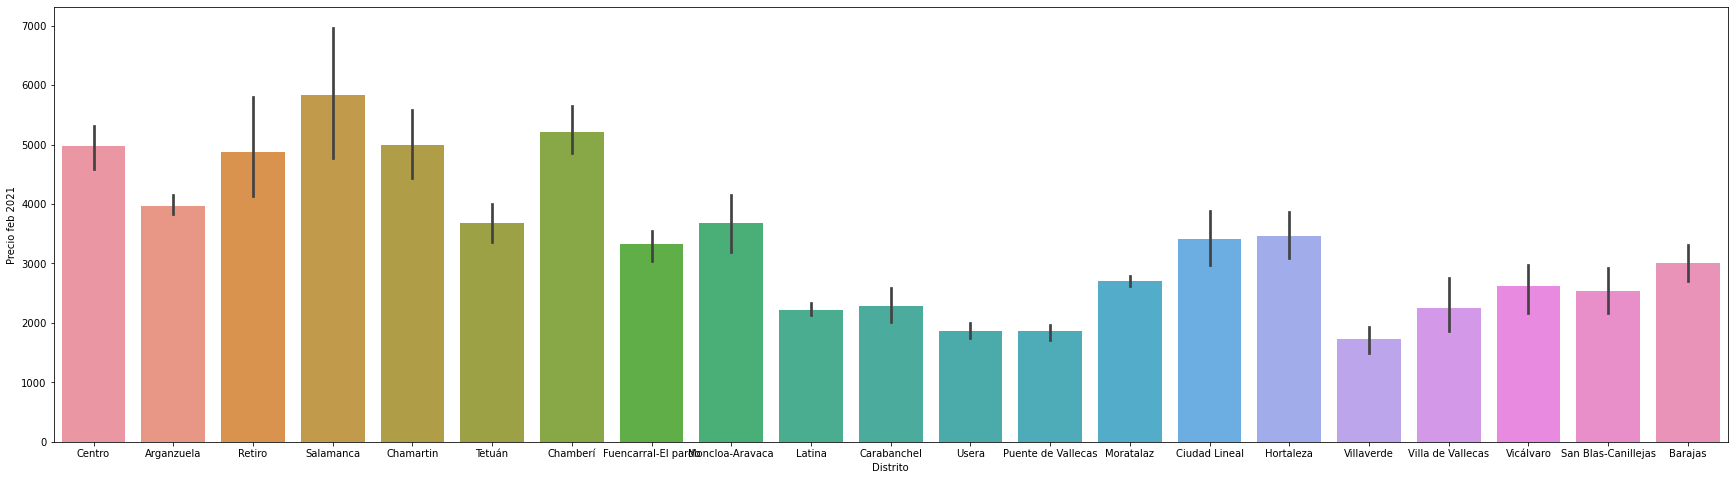

In [23]:
plt.figure(figsize = (30, 8))

sns.barplot(x = df["Distrito"], y = df["Precio feb 2021"])
plt.show()

# Los Barrios más caros son: Salamanca, Chamartin, Retiro, Centro y Chamberí

<Figure size 2160x576 with 0 Axes>

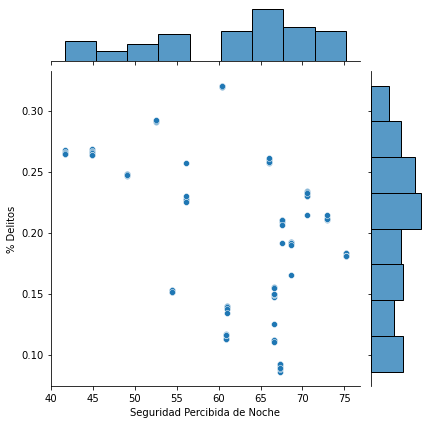

In [24]:
#seguridad percibida por la noche vs delitos de intervención policial

plt.figure(figsize = (30, 8))

sns.jointplot(x = df["Seguridad Percibida de Noche"],
              y = df[df["% Delitos"]<0.35]["% Delitos"])
plt.show()

#Llegamos a la conclusión que hay relación inversa entre % delitos y 
# seguridad percibida de noche. Hemos tenido que filtrar para
# obtener unos datos más limpios.

In [25]:
#calidad del aire vs zonas verdes 





In [26]:
df["Superficie(m2)"] = df["Superficie"] * 1000 * 1000 

In [27]:
df.head(3)

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n,% Defunciones,% Delitos,Superficie(m2)
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6,0.810298,1.371597,1470000.0
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6,0.728443,1.372184,1032000.0
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6,0.796813,1.371259,592000.0


In [28]:
df["% Zonas Verdes"] = df["Zonas verdes (m2)"] / df["Superficie(m2)"] * 100
df.head(23)

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n,% Defunciones,% Delitos,Superficie(m2),% Zonas Verdes
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,-0.100,0.008,0.018,5073.0,77.3,73.6,0.810298,1.371597,1470000.0,19.526463
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,0.000,-1.700,-7.300,4489.0,77.3,73.6,0.728443,1.372184,1032000.0,3.895155
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,0.015,0.030,-2.100,5481.0,77.3,73.6,0.796813,1.371259,592000.0,1.175507
4,Madrid,Centro,Justicia,18092,1419,13775,2827,44.09,243.827493,0.742,...,0.012,-1.700,-1.700,6120.0,77.3,73.6,0.674331,1.370772,742000.0,3.021833
5,Madrid,Centro,Universidad,33540,2503,25700,5215,43.68,354.171067,0.947,...,0.003,-1.000,-4.400,5497.0,77.3,73.6,0.778175,1.371497,947000.0,1.695143
6,Madrid,Centro,Sol,7647,486,5843,1293,44.63,171.842697,0.445,...,-2.300,-2.000,-1.600,5468.0,77.3,73.6,0.562312,1.373087,445000.0,1.405843
8,Madrid,Arganzuela,Imperial,22908,2637,15243,5028,46.32,236.897622,0.967,...,0.000,0.000,0.006,4096.0,81.3,77.9,0.934171,0.192073,967000.0,12.400414
9,Madrid,Arganzuela,Las Acacias,36922,3850,24434,8638,46.71,343.780261,1.074,...,0.011,0.006,-0.200,4273.0,81.3,77.9,0.904610,0.192297,1074000.0,25.695531
10,Madrid,Arganzuela,La Chopera,20287,2174,13558,4555,46.18,358.427562,0.566,...,-0.400,0.031,0.016,3843.0,81.3,77.9,0.867551,0.192241,566000.0,23.243110
11,Madrid,Arganzuela,Legazpi,19810,3754,14215,1841,38.80,141.905444,1.396,...,-0.200,0.027,-1.700,4714.0,81.3,77.9,0.449268,0.191822,1396000.0,40.614542


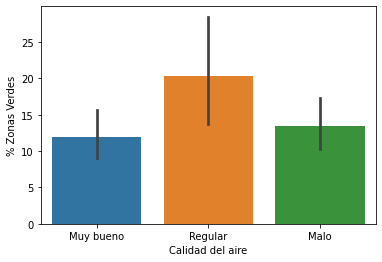

In [29]:
sns.barplot(x = df["Calidad del aire"],
              y = df["% Zonas Verdes"])
            
plt.show()

# No parece existir relación entre la calidad del aire y las zonas verdes.

In [30]:
#Calidad de vida barrio vs ocio cultura

df["Calidad de vida actual en su barrio \n"]



1      73.6
2      73.6
3      73.6
4      73.6
5      73.6
       ... 
147    80.9
148    80.9
149    80.9
150    80.9
151    80.9
Name: Calidad de vida actual en su barrio \n, Length: 131, dtype: float64

In [31]:
df["Ocio/cultura"]

1      140.0
2      279.0
3       64.0
4      107.0
5      198.0
       ...  
147    274.0
148     26.0
149    105.0
150    176.0
151    106.0
Name: Ocio/cultura, Length: 131, dtype: float64

In [32]:
diccionario = {
 'El Pilar':'Pilar',
 'El Salvador':'Salvador' ,
 'Ensanche de Vallecas':'Casco Histórico de Vallecas',
 'Fuentelarreina':'Fuentelareina',
 'La Chopera':'Chopera',
 'Las Acacias':'Acacias',
 'Las Aguilas':'Aguilas',
 'Los Cármenes':'Cármenes',
 'Peña Grande':'Peñagrande',
 'Ríos Rosas':'Rios Rosas'}

df["Barrios"].replace(diccionario, inplace=True)

In [33]:
geoBarr = 'barrios.geojson'

world_map = folium.Map(location = [40.5167754,-3.7037902], zoom_start = 10)

In [36]:
folium.Choropleth(geo_data = geoBarr,
                  data = df,
                  columns = ["Barrios", "Población"],
                  key_on = "feature.properties.nombre").add_to(world_map)

world_map

In [37]:
import json

In [38]:
with open('barrios.geojson','br') as file:
    data = json.load(file)
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-3.63693, 40.468875],
       [-3.634108, 40.468605],
       [-3.633838, 40.468622],
       [-3.633668, 40.468661],
       [-3.633597, 40.468677],
       [-3.633397, 40.46877],
       [-3.633107, 40.468902],
       [-3.633063, 40.468898],
       [-3.632944, 40.468888],
       [-3.631246, 40.468739],
       [-3.630124, 40.468635],
       [-3.629939, 40.468598],
       [-3.62762, 40.468142],
       [-3.623579, 40.462637],
       [-3.624599, 40.462638],
       [-3.629654, 40.462639],
       [-3.633266, 40.462673],
       [-3.635381, 40.462691],
       [-3.636239, 40.462687],
       [-3.637269, 40.462686],
       [-3.63759, 40.462652],
       [-3.63789, 40.462601],
       [-3.63814, 40.462545],
       [-3.638439, 40.462464],
       [-3.638748, 40.462359],
       [-3.638904, 40.462282],
       [-3.639153, 40.462124],
       [-3.639648, 40.461781],
       [-3.641482, 

In [39]:
listaBarrios = list()
for barrio in range(len(data['features'])):
#     print(barrio)
    listaBarrios.append(data['features'][barrio]['properties']['nombre'])
sorted(listaBarrios)

['Abrantes',
 'Acacias',
 'Adelfas',
 'Aeropuerto',
 'Aguilas',
 'Alameda de Osuna',
 'Almagro',
 'Almenara',
 'Almendrales',
 'Aluche',
 'Ambroz',
 'Amposta',
 'Apostol Santiago',
 'Arapiles',
 'Aravaca',
 'Arcos',
 'Argüelles',
 'Atalaya',
 'Atocha',
 'Bellas Vistas',
 'Berruguete',
 'Buenavista',
 'Butarque',
 'Campamento',
 'Canillas',
 'Canillejas',
 'Casa de Campo',
 'Casco Histórico de Barajas',
 'Casco Histórico de Vallecas',
 'Casco Histórico de Vicálvaro',
 'Castellana',
 'Castilla',
 'Castillejos',
 'Chopera',
 'Ciudad Jardín',
 'Ciudad Universitaria',
 'Colina',
 'Comillas',
 'Concepción',
 'Corralejos',
 'Cortes',
 'Costillares',
 'Cuatro Caminos',
 'Cuatro Vientos',
 'Cármenes',
 'Delicias',
 'El Goloso',
 'El Pardo',
 'El Plantío',
 'El Viso',
 'Embajadores',
 'Entrevías',
 'Estrella',
 'Fontarrón',
 'Fuente del Berro',
 'Fuentelareina',
 'Gaztambide',
 'Goya',
 'Guindalera',
 'Hellín',
 'Hispanoamérica',
 'Horcajo',
 'Ibiza',
 'Imperial',
 'Jerónimos',
 'Justicia',
 'La

In [40]:
len(listaBarrios)

128

In [41]:
setDf = set(list(df['Barrios']))
setListaBarrios = set(listaBarrios)

setListaBarrios.difference(setDf)

{'Ambroz'}

In [ ]:
setDf = set(list(df['Barrios']))
setListaBarrios = set(listaBarrios)

setDf.difference(setListaBarrios)



In [ ]:
listaBarrios

In [ ]:
list

In [ ]:
len(data['features'])

In [ ]:
df.columns

In [ ]:
str_match = list(filter(lambda x: 'Val' in x, listaBarrios))
print(str_match)

In [ ]:
df.columns

In [ ]:
df[df['Barrios'] == "Casco Histórico de Vallecas"]
df_barrios = df.groupby('Barrios', as_index = False)['Población'].sum()

In [43]:
df2 = df[["Barrios", 'Latidud', 'Longitud']]
df2.dropna(inplace = True)

C:\Users\UsuarioM\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
df2

,Barrios,Latidud,Longitud
1,Palacio,40.41513,-3.71562
2,Embajadores,40.40968,-3.70164
3,Cortes,40.41435,-3.69853
4,Justicia,40.42396,-3.69575
5,Universidad,40.42531,-3.70663
...,...,...,...
147,Alameda de Osuna,40.45758,-3.58797
148,Aeropuerto,40.49484,-3.57408
149,Casco Histórico de Barajas,40.47361,-3.57722
150,Timón,40.38634,-3.70697


In [45]:
# Volvemos a inicializar el mapa
sf_map = folium.Map(location = [40.5167754,-3.7037902], zoom_start = 11)

# Inicializamos un FeatureGroup() para los incidentes en el DataFrame
loc_barrios = folium.map.FeatureGroup()

# Recorre los 100 crímenes y agrega a cada uno al FeatureGroup() de incidentes
# La columna Y y X son las coordenadas, latitud y longitud respectivamente
# La columna "Category" es el tipo de incidente.

for lat, lng, label in zip(df2["Latidud"], df2["Longitud"], df2["Barrios"]):
    # Tiene muchos parámetros para personalizar
    loc_barrios.add_child(folium.Marker(location = [lat, lng],
                                        icon= folium.Icon(icon='fa-birthday-cake',icon_color='white', color='green', prefix='fa'),
                                        popup = label))
    
# Agrega incidentes al map
sf_map.add_child(loc_barrios)

sf_map

In [ ]:
df.columns